In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IA.utils import mapping, parameter_range
from scipy import stats
import math
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn import svm

In [2]:
df = pd.read_csv("analysis/not_uploaded/IA/KADID10k/.scratch.ckpts.IA.pexels.scores-one.change_regress.epoch-9.pth.txt")
mos = pd.read_csv("analysis/not_uploaded/dmos.csv")

df["img"] = df["img"].apply(lambda row: Path(row).name)

mos = mos.rename(columns={"dist_img": "img"})

df = df.set_index("img").join(mos.set_index("img"))
df = pd.DataFrame(df.to_records())

df = df.dropna()

df["img"] = df["img"].apply(lambda row: row.split(".")[0])

df["img_id"] = df["img"].apply(lambda row: int(row.split("_")[0][1:]))
df["distortion"] = df["img"].apply(lambda row: int(row.split("_")[1]))
df["dist_level"] = df["img"].apply(lambda row: int(row.split("_")[2]))

try:
    df["score"] = (df["styles_score"] + df["technical_score"] + df["composition_score"])/3
except:
    pass
df

,img,score,styles_contrast_strength,styles_brightness_strength,styles_saturation_strength,styles_shadows_strength,styles_highlights_strength,styles_exposure_strength,styles_vibrance_strength,styles_temperature_strength,...,composition_vcrop_strength,composition_leftcornerscrop_strength,composition_rightcornerscrop_strength,composition_ratio_strength,ref_img,dmos,var,img_id,distortion,dist_level
0,I61_24_05,0.554199,-0.282471,0.316650,0.021835,0.150391,-0.056519,0.100403,0.108582,-0.191528,...,0.038574,0.044281,0.039337,0.359375,I61.png,1.27,0.573,61,24,5
1,I56_07_03,0.521973,-0.382324,0.297607,-0.354980,-0.526367,0.093872,-0.206909,0.148804,-0.321289,...,0.091309,0.064331,0.095093,-0.227905,I56.png,2.43,1.116,56,7,3
2,I66_16_02,0.639160,-0.030136,-0.128052,0.508789,-0.520508,0.099731,-0.156372,0.223145,0.194458,...,-0.293945,-0.305420,-0.311035,0.228027,I66.png,4.40,0.611,66,16,2
3,I04_18_04,0.736328,0.378662,0.127441,-0.410400,-0.023056,0.135132,0.351807,0.024506,-0.065735,...,0.150146,0.111572,0.173828,-0.079651,I04.png,4.57,0.496,4,18,4
4,I09_15_03,0.650391,0.054199,0.148804,0.348877,-0.216919,0.390137,0.056091,0.115540,0.303711,...,-0.016388,-0.011024,0.010147,0.063477,I09.png,2.23,0.761,9,15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10201,I76_09_02,0.297363,0.100159,0.127075,-0.077515,-0.118591,0.441406,0.195190,0.089355,0.163452,...,0.092712,0.073364,0.074219,0.077637,I76.png,3.50,0.764,76,9,2
10202,I72_07_04,0.307617,-0.098206,0.234619,-0.120850,-0.145996,0.203979,-0.139893,0.126953,0.185303,...,-0.336426,-0.371094,-0.350098,0.031616,I72.png,2.37,1.016,72,7,4
10203,I61_20_04,0.768555,-0.016159,0.395264,0.023453,0.130249,-0.024475,0.249268,0.147827,-0.404053,...,0.161499,0.175781,0.162109,0.487793,I61.png,4.03,0.836,61,20,4
10204,I08_17_03,0.324219,-0.315186,0.055389,0.500488,-0.188843,0.144043,-0.185181,0.223511,0.286133,...,-0.151855,-0.148438,-0.171143,0.400879,I08.png,4.47,0.670,8,17,3


In [ ]:
Blurs
# 01 Gaussian blur: filter with a variable Gaussian kernel
# 02 Lens blur: filter with a circular kernel
# 03 Motion blur: ​filter with a line kernel
Color distortions
# 04 Color diffusion:  Gaussian blur the color channels (a and b) in the Lab color-space
# 05 Color shift:  randomly translate the green channel, and blend it into the original image masked by a gray level map: the normalized gradient magnitude of the original image
# 06 Color quantization: convert to indexed image using minimum variance quantization and dithering with 8 to 64 colors
# 07 Color saturation 1:  multiply the saturation channel in the HSV color-space by a factor
# 08 Color saturation 2: multiply the color channels in the Lab colorspace by a factor
Compression
# 09 JPEG2000: standard compression
# 10 JPEG: standard compression
Noise
# 11 White noise: add Gaussian white noise to the RGB image
# 12 White noise in color component: add Gaussian white noise to the YCbCr converted image (both to the luminance ‘Y‘ and the color channels ‘Cb‘ and ‘Cr‘)
# 13 Impulse noise:  add salt and pepper noise to the RGB image
# 14 Multiplicative noise: add speckle noise to the RGB image
# 15 Denoise: add Gaussian white noise to RGB image, and then apply a denoising DnCNN to each channel separately
Brightness change
# 16 Brighten: non-linearly adjust the luminance channel keeping extreme values fixed, and increasing others
# 17 Darken: similar to brighten, but decrease other values
# 18 Mean shift:  add constant to all values in image, and truncate to original value range
Spatial distortions
# 19 Jitter: randomly scatter image data by warping each pixel with random small offsets (bicubic interpolation)
# 20 Non-eccentricity patch:  randomly offset small patches in the image to nearby locations
# 21 Pixelate: downsize image and upsize it back to the original size using nearest-neighbor interpolation in each case
# 22  Quantization: quantize image values using N thresholds obtained using Otsus method
# 23  Color block: insert homogeneous random colored blocks at random locations in the image
Sharpness and contrast
# 24 High sharpen:  over-sharpen image using unsharp masking
# 25 Contrast change:  non-linearly change RGB values using a Sigmoid-type adjustment curve

In [8]:
def histogram_distortion(distortion:int, score:str):
    plot_frame = df[(df["distortion"] == distortion) | (df["distortion"] == 0)]
    for dist_level in range(6):
        sns.distplot(plot_frame[(plot_frame["dist_level"] == dist_level)][score], label=f"{distortion}: {dist_level}")
    plt.legend()

In [9]:
def violin_distortion(distortion:int, score:str):
    plot_frame = df[(df["distortion"] == distortion) | (df["distortion"] == 0)]
    sns.violinplot(data=plot_frame, x="dist_level", y=score, color="steelblue")
    plt.legend()

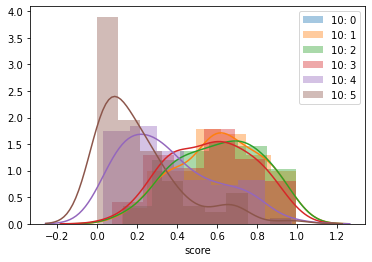

In [55]:
histogram_distortion(10, "score")

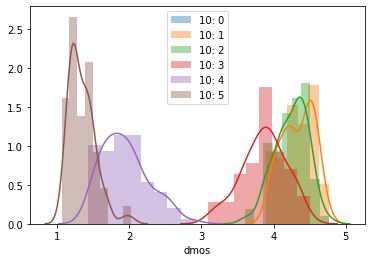

In [52]:
histogram_distortion(10, "dmos")

No handles with labels found to put in legend.


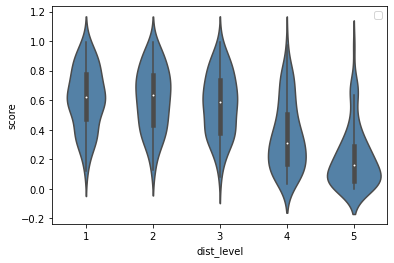

In [12]:
violin_distortion(10, "score")

No handles with labels found to put in legend.


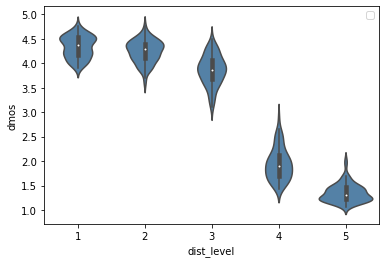

In [13]:
violin_distortion(10, "dmos")

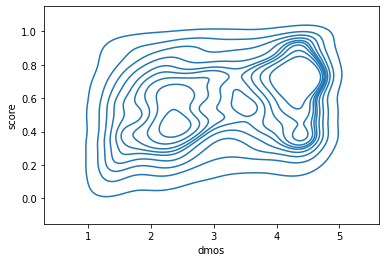

In [5]:
sns.kdeplot(x=df["dmos"], y=df["score"])

In [59]:
for dist in range(1, 26):
    results = []
    for img in range(1,82):
        results.append(stats.spearmanr(df[(df["img_id"] == img) & (df["distortion"] == dist)]["dist_level"], df[(df["img_id"] == img) & (df["distortion"] == dist)]["score"]))
    print(dist,"\t", sum([val[0] for val in results])/len(results))

1 	 -0.2361873336111382
2 	 -0.34342625999868587
3 	 0.042576556572786944
4 	 -0.3470097963657473
5 	 0.040428141166430814
6 	 -0.30408044735723616
7 	 -0.32839506172839483
8 	 -0.31142371068542085
9 	 -0.48848007319574505
10 	 -0.7641975308641973
11 	 -0.3021565362281592
12 	 -0.418366279142265
13 	 -0.3888888888888887
14 	 -0.458818371526504
15 	 -0.4111111111111109
16 	 -0.45679012345679004
17 	 -0.14280106085006605
18 	 0.0897385923147878
19 	 -0.3255812543120045
20 	 -0.1377345010866826
21 	 -0.07452308262863226
22 	 -0.30994068728909907
23 	 -0.22428254233154754
24 	 -0.5666666666666667
25 	 -0.10909098386320025


In [60]:
for dist in range(1, 26):
    results = []
    for img in range(1,82):
        results.append(stats.spearmanr(df[(df["img_id"] == img) & (df["distortion"] == dist)]["dist_level"], df[(df["img_id"] == img) & (df["distortion"] == dist)]["dmos"]))
    print(dist,"\t", sum([val[0] for val in results])/len(results))

1 	 -0.9864039226904143
2 	 -0.974611589173264
3 	 -0.991045425117048
4 	 -0.9501366146040487
5 	 -0.8253626359625637
6 	 -0.945350582375364
7 	 -0.6462769218715605
8 	 -0.9867165222647243
9 	 -0.9464329109003451
10 	 -0.9694009108554302
11 	 -0.9814498206894711
12 	 -0.9907007535031268
13 	 -0.9597805327148429
14 	 -0.9871334587796713
15 	 -0.9845441556405602
16 	 -0.9885604589185737
17 	 -0.9572314224371462
18 	 -0.30898705817016414
19 	 -0.988263689740269
20 	 -0.7733695716491109
21 	 -0.9024614262282671
22 	 -0.9175888406173913
23 	 -0.6557042369670609
24 	 -0.9907328255427382
25 	 0.07259105067775223


In [63]:
ranks = []
for dist in range(1, 26):
    results = []
    for img in range(1,82):
        results.append(stats.pearsonr(df[(df["img_id"] == img) & (df["distortion"] == dist)]["dmos"], df[(df["img_id"] == img) & (df["distortion"] == dist)]["score"]))
    print(dist,"\t", sum([val[0] for val in results])/len(results))
    ranks.append(sum([val[0] for val in results])/len(results))
print("avg", "\t", sum(ranks) / len(ranks))

1 	 0.2727309348127621
2 	 0.2799338480968673
3 	 -0.07894977464218425
4 	 0.2828327795903675
5 	 0.04384463928477141
6 	 0.32725039030391706
7 	 0.2334861714435882
8 	 0.27752772639505574
9 	 0.5860044622918309
10 	 0.844235898543086
11 	 0.3011561321557373
12 	 0.44958037171392484
13 	 0.39490717072322046
14 	 0.4354941272485114
15 	 0.4333845739895281
16 	 0.5015700031310616
17 	 0.25203762973620336
18 	 -0.05338839418051114
19 	 0.3177033101851384
20 	 0.07156574137069753
21 	 0.1415023003781551
22 	 0.2933281845078147
23 	 0.23323387945770108
24 	 0.5829909436377955
25 	 0.16387734396344064
avg 	 0.30351361576553926


In [19]:
stats.spearmanr(df[["dmos", "score"]])

SpearmanrResult(correlation=0.20565606856004143, pvalue=3.899678531643207e-97)

In [20]:
stats.pearsonr(df["dmos"], df["score"])

(0.2151315733255617, 2.516823952851043e-106)

In [10]:
features = [c for c in df.columns if c not in ["index", "img", "img_id", "distortion", "dist_level", "var", "ref_img"]]
reg_df = df.dropna()
train = reg_df[reg_df["img_id"] <= 30].reset_index()[features]
test = reg_df[reg_df["img_id"] > 30].reset_index()[features]

In [11]:
reg = svm.SVR().fit(train.drop(columns=["dmos"]), train["dmos"])
reg.score(train.drop(columns=["dmos"]), train["dmos"])

0.5819551039065403

In [12]:
reg.score(test.drop(columns=["dmos"]), test["dmos"])

-0.9644658753261215

In [13]:
stats.pearsonr(reg.predict(test.drop(columns=["dmos"])), test["dmos"])

(0.07304127165799638, 5.266223291288224e-09)

In [14]:
reg = LinearRegression().fit(train.drop(columns=["dmos"]), train["dmos"])
reg.score(train.drop(columns=["dmos"]), train["dmos"])

0.10675355282712617

In [15]:
reg.score(test.drop(columns=["dmos"]), test["dmos"])

0.027518499425859932

In [16]:
reg.score(test.drop(columns=["dmos"]), test["dmos"])

0.027518499425859932

In [17]:
stats.pearsonr(reg.predict(test.drop(columns=["dmos"])), test["dmos"])

(0.2424286359557874, 6.211680258150375e-86)

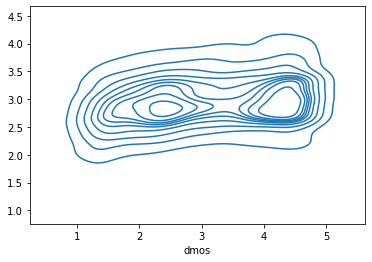

In [18]:
sns.kdeplot(x=test["dmos"], y=reg.predict(test.drop(columns=["dmos"])))

In [183]:
df[~df["img"].str.contains("00_0")].sort_values(by="img").reset_index()[["score","img"]].to_csv("analysis/not_uploaded/IA/TID/pred_scores", index=False, sep=" ")